# Project : Investigate dataset (Gapminder world project)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#income">Income</a></li>    
<ul>
<li><a href="#wrangling 1">Data Wrangling</a></li>
<li><a href="#eda 1">Exploratory Data Analysis</a></li>
<li><a href="#conclusions 1">Conclusions</a></li>
</ul>
<li><a href="#fert">Fertility</a></li>
<ul>
<li><a href="#wrangling 2">Data Wrangling</a></li>
<li><a href="#eda 2">Exploratory Data Analysis</a></li>
<li><a href="#conclusions 2">Conclusions</a></li>
</ul> 
<li><a href="#population">Population</a></li>
<ul>
<li><a href="#wrangling 3">Data Wrangling</a></li>
<li><a href="#eda 3">Exploratory Data Analysis</a></li>
<li><a href="#conclusions 3">Conclusions</a></li>
</ul>        
<li><a href="#combined">Combined Dataset</a></li>
<ul>
<li><a href="#wrangling 4">Data Wrangling</a></li>
<li><a href="#eda 4">Exploratory Data Analysis</a></li>
<li><a href="#conclusions 4">Conclusions</a></li>
</ul>       
</ul>    

<a id='intro'></a>
# Introduction
### Gapminder has collected a lot of information about how people live their lives in different countries,tracked across the years, and on a number of different indicators. For this project, i select 3 different indicators to investigate

### The three different indicators that i had chosen income & fertility & population  [https://www.gapminder.org/data/]
### we will investigate in each metric then we will investigate the combined dataset between the 3 metrics


Here is the questions that we will try to answer
### What is the (income/fertility/population) distribution for the countries over specific year ?
### Which country is the (highest/lowest) income paid over this year ?
### Which country is the (highest/lowest) (fertility/population) over this year ?
### What is the (income/fertility/population) distribution for specific country through years ?
### Are there trends that can be observed between the selected metrics?
### what is the correlation between each metric?
### How can we classify the the countries for each metric ?

In [1]:
# import the libraries and modules that we can use in this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib 
sns.set_style("darkgrid")

Using matplotlib backend: <object object at 0x000001DFA38A10D0>


<a id='income'></a>
# 1- Income dataset

<a id='wrangling 1'></a>
# Data Wrangling


### - General Properties

In [2]:
#first we load the dataset and show its properties
df1 = pd.read_csv('income_per_person.csv')
df1.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
1,Angola,700,702,705,709,711,714,718,721,725,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
2,Albania,755,755,755,755,755,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
3,Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
4,United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [3]:
df1.shape

(195, 252)

we need to reshape our data to generate a column for the income and column for the year so we will use melt function 
[https://www.geeksforgeeks.org/python-pandas-melt/]

In [4]:
df_income = pd.melt(df1,id_vars =['country'],value_vars=df1.columns[1:],var_name ='year',value_name = 'income')
df_income

,country,year,income
0,Afghanistan,1800,683
1,Angola,1800,700
2,Albania,1800,755
3,Andorra,1800,1360
4,United Arab Emirates,1800,1130
...,...,...,...
48940,Samoa,2050,10.7k
48941,Yemen,2050,4540
48942,South Africa,2050,19.7k
48943,Zambia,2050,5680


In [5]:
df_income.shape

(48945, 3)

In [6]:
df_income['country'].nunique()

195

it is normal because we repeat countries for each year after reshaping our data

In [7]:
df_income.duplicated().sum()

0

In [8]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48945 entries, 0 to 48944
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  48945 non-null  object
 1   year     48945 non-null  object
 2   income   48945 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


### Data Cleaning

In [9]:
df_income.dtypes

country    object
year       object
income     object
dtype: object

we see  a problem here we need to convert year and income to a numeric value

In [10]:
df_income['year'] = df_income['year'].astype(int)

we should assure that all data in income column are string so we can convert it easily to numeric

In [11]:
df_income['income'] = df_income['income'].astype(str)

we can use this (astype(int)) for year but it doesn't work for the whole income due to k that mean 1000 so we will make  a function that convert this k to 1000 to guarantee that we have a numeric value 

In [12]:
def value_to_float(x):
    x = x.strip()   
        
    if 'k' in x :
        if len(x)>1:
            return float(x.replace('k',''))*1000
        else :
            return 1000.0
    if 'M' in x :
        if len(x)>1:
            return float(x.replace('M',''))*1000000
        else :
            return 1000000.0
    if 'B' in x :
        if len(x)>1:
            return float(x.replace('B',''))*1000000000
        else :
            return 1000000000.0    
    else :
        return float(x)

we set this function and added M & B for million and billion to use it when we deal with the population dataset in the future

In [13]:
#we will apply the function to income column to make it numeric
df_income['income'] = df_income['income'].apply(value_to_float)

In [14]:
#check for converting datatypes 
df_income.dtypes

country     object
year         int32
income     float64
dtype: object

In [15]:
df_income

,country,year,income
0,Afghanistan,1800,683.0
1,Angola,1800,700.0
2,Albania,1800,755.0
3,Andorra,1800,1360.0
4,United Arab Emirates,1800,1130.0
...,...,...,...
48940,Samoa,2050,10700.0
48941,Yemen,2050,4540.0
48942,South Africa,2050,19700.0
48943,Zambia,2050,5680.0


In [16]:
df_income.isnull().sum()

country    0
year       0
income     0
dtype: int64

<a id='eda 1'></a>
# Exploratory Data Analysis

# Year : 
Based on the year that user will input it we will explore our data and know the different countries' income over this year

In [17]:
y = int(input('enter the year that you want to show its income through countries from 1800 to 2050 : ' ))
while y not in list(df_income.year) :
    print('invalid input')
    y = int(input('enter the year that you want to show its income through countries from 1800 to 2050 : ' ))


enter the year that you want to show its income through countries from 1800 to 2050 : 2002


In [18]:
df_y = df_income.query(f'year=={y}')
df_y

,country,year,income
39390,Afghanistan,2002,1190.0
39391,Angola,2002,2930.0
39392,Albania,2002,6750.0
39393,Andorra,2002,36100.0
39394,United Arab Emirates,2002,73500.0
...,...,...,...
39580,Samoa,2002,5310.0
39581,Yemen,2002,4990.0
39582,South Africa,2002,11400.0
39583,Zambia,2002,2080.0


we set a dataframe based on the year that user input it then we will show different statistics

In [19]:
df_y['income'].describe()

count       195.000000
mean      15657.702564
std       18440.882139
min         715.000000
25%        3145.000000
50%        8540.000000
75%       18550.000000
max      103000.000000
Name: income, dtype: float64

### What is the income distribution for the countries over this year ?

In [20]:
df_y['income'].hist(figsize=(16,6.5));
plt.xlabel('income')
plt.ylabel('numbr of countries')
plt.title(f'income distribution over countries in {y}')

Text(0.5, 1.0, 'income distribution over countries in 2002')

In [25]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('country')
plt.ylabel('income')
plt.title(f'income through countries over {y}')
plt.bar(df_y.country,df_y.income)
plt.show()


### conclusion : as we see there are different countries that has a high rate income than others over this year

### Which country is the highest income paid over this year ?

In [21]:
df_y.query(f'income == {df_y.income.max()}')


,country,year,income
39494,Luxembourg,2002,103000.0


### Which country is the lowest income paid over this year ?

In [22]:
df_y.query(f'income == {df_y.income.min()}')


,country,year,income
39425,"Congo, Dem. Rep.",2002,715.0


# Country: 
Based on the country that user will input it we will explore our data and know the income for this country through years

In [23]:
c = input('enter the country that you want to see their income over years : ' ).title()
while c not in list(df_income.country) :
    print('invalid input')
    c = input('enter the country that you want to see their income over years : ' ).title()


enter the country that you want to see their income over years : egypt


In [24]:
df_c = df_income[df_income.country==c]
df_c


,country,year,income
51,Egypt,1800,1120.0
246,Egypt,1801,1120.0
441,Egypt,1802,1120.0
636,Egypt,1803,1120.0
831,Egypt,1804,1120.0
...,...,...,...
48021,Egypt,2046,23900.0
48216,Egypt,2047,24400.0
48411,Egypt,2048,24900.0
48606,Egypt,2049,25500.0


we set a dataframe based on the country that user input it then we will show different statistics

In [25]:
df_c['income'].describe()

count      251.000000
mean      4735.338645
std       6002.867397
min       1110.000000
25%       1345.000000
50%       1790.000000
75%       5885.000000
max      26000.000000
Name: income, dtype: float64

### What is the income distribution for this country through years ?

In [26]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('year')
plt.ylabel('income')
plt.title(f'income through years for {c}')
plt.plot(df_c.year,df_c.income)
plt.show()

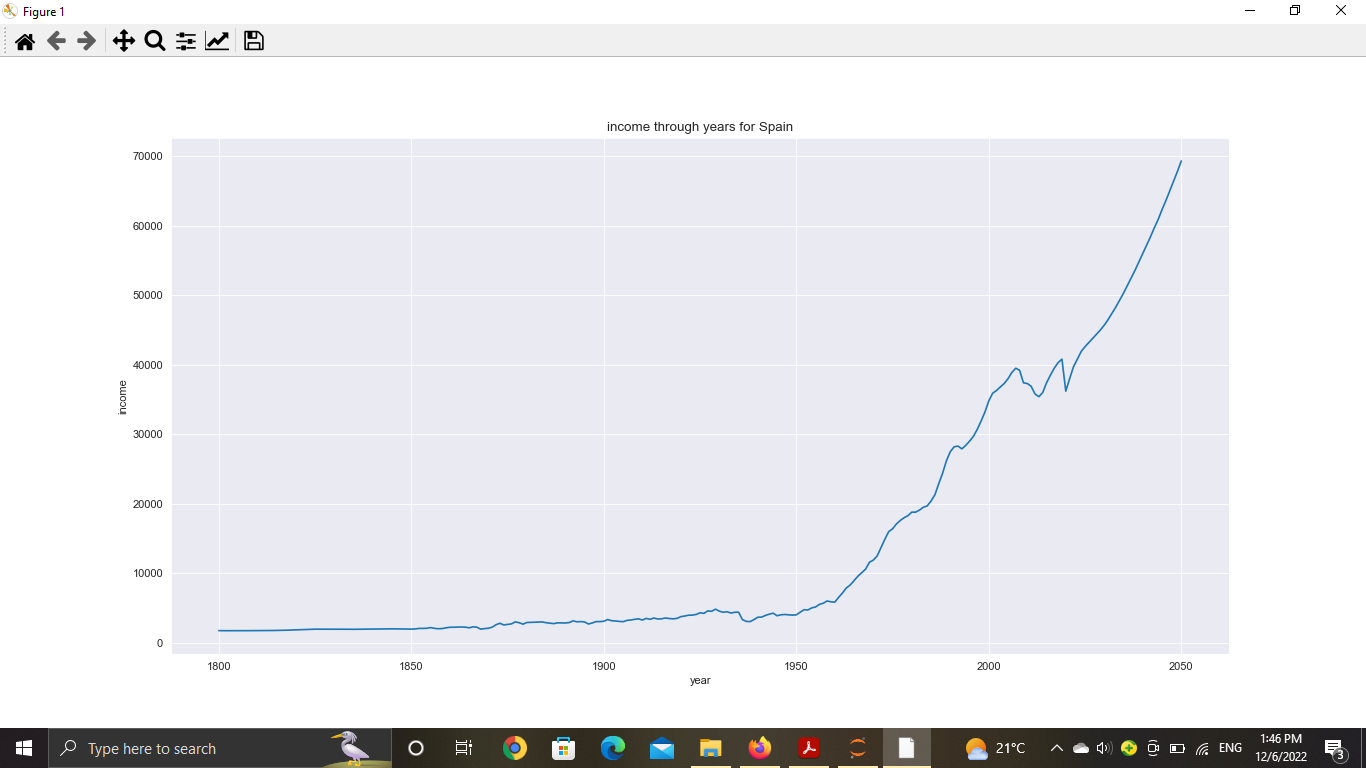

conclusion : i chose spain as a country to investigate and as we see the income rate increase remarkably from 1960 but from 2006 to 2022 there is an economic crisis so there is no stability for incomethrough these years


<a id='conclusions 1'></a>
# Conclusions
###  -There are certain regions of the world been growing in income better than others
###  - I chose spain as a country to investigate and as we see the income rate increase remarkably from 1960 but from 2006 to 2022 there is an economic crisis so there is no stability for income through these years

<a id='fert'></a>
# 2- Fertility dataset
<a id='wrangling 2'></a>
# Data Wrangling
### - General Properties

In [18]:
#first we load the dataset and show its properties
df2 = pd.read_csv('children_per_woman_total_fertility.csv')
df2.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.83,1.83
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74,1.74
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.78,1.78,1.78,1.79,1.79,1.79,1.79,1.79,1.79,1.79
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.00,2.00,2.01,2.01,2.01,2.01,2.01,2.02,2.02,2.02


we need to reshape our data to generate a column for the fertility and column for the year so we will use melt function

In [19]:
df_fert = pd.melt(df2,id_vars =['country'],value_vars=df2.columns[1:],var_name ='year',value_name = 'fertility')
df_fert

,country,year,fertility
0,Aruba,1800,5.64
1,Afghanistan,1800,7.00
2,Angola,1800,6.93
3,Albania,1800,4.60
4,Netherlands Antilles,1800,5.80
...,...,...,...
60797,Samoa,2100,2.02
60798,Yemen,2100,1.70
60799,South Africa,2100,1.80
60800,Zambia,2100,2.46


In [20]:
df_fert['year']= df_fert['year'].astype(int)

In [21]:
df_fert.dtypes

country       object
year           int32
fertility    float64
dtype: object

In [22]:
df_fert.isnull().sum()

country       0
year          0
fertility    87
dtype: int64

we have some missing values in fertility so we will fill the missing values by enter the mean for each country 

In [23]:
countries = list()
for col in df_fert.country:
    df_fert.loc[df_fert.country == col]['fertility']
    mean = df_fert.loc[df_fert.country == col]['fertility'].mean()
    df_fert.loc[df_fert.country == col] = df_fert.loc[df_fert.country == col].fillna(mean)
    if col in countries :
        break
    else :    
        countries.append(col)    
        

In [24]:
df_fert.isnull().sum()

country      0
year         0
fertility    0
dtype: int64

<a id='eda 2'></a>
# Exploratory Data Analysis

# Year : 
Based on the year that user will input it we will explore our data and know the different countries' income over this year

In [38]:
y = int(input('enter the year that you want to show its fertility through countries from 1800 to 2100 : ' ))
while y not in list(df_fert.year) :
    print('invalid input')
    y = int(input('enter the year that you want to show its fertility through countries from 1800 to 2100 : ' ))


enter the year that you want to show its fertility through countries from 1800 to 2100 : 2005


In [39]:
df_y = df_fert.query(f'year=={y}')

### What is the fertility distribution for the countries over this year ?

In [40]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('country')
plt.ylabel('fertility')
plt.title(f'fertility through countries over {y}')
plt.bar(df_y.country,df_y.fertility)
plt.show()

### conclusion : as we see there are different countries that has a high fertility than others over this year

### Which country is the highest fertility over this year ?

In [41]:
df_y.query(f'fertility == {df_y.fertility.max()}')

,country,year,fertility
41542,Niger,2005,7.61


### Which country is the lowest fertility over this year ?

In [42]:
df_y.query(f'fertility == {df_y.fertility.min()}')

,country,year,fertility
41521,"Macao, China",2005,0.84


# Country: 
Based on the country that user will input it we will explore our data and know the fertility for this country through years

In [43]:
c = input('enter the country that you want to see its fertility over years : ' ).title()
while c not in list(df_fert.country) :
    print('invalid input')
    c = input('enter the country that you want to see their fertility over years : ' ).title()


enter the country that you want to see its fertility over years : egypt


In [44]:
df_c = df_fert[df_fert.country==c]

### What is the fertility distribution for this country through years ?

In [46]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('year')
plt.ylabel('fertility')
plt.title(f'fertility through years for {c}')
plt.plot(df_c.year,df_c.fertility)
plt.show()

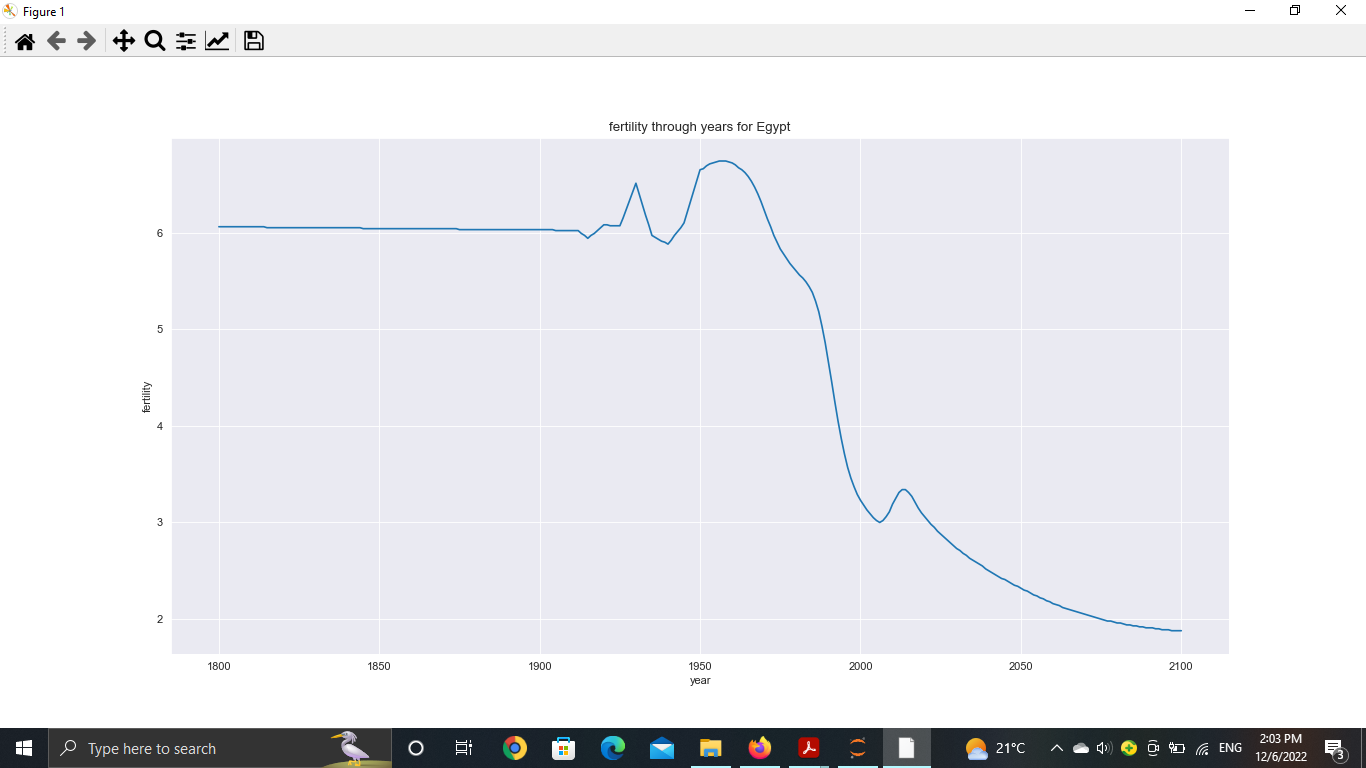

<a id='conclusions 2'></a>
# Conclusions
###  -There are certain regions of the world been growing in fertility better than others
###  - I chose Egypt as a country to investigate and as we see the fertility rate decrease remarkably from 1960 due to awareness of government about Birth-control

<a id='population'></a>
# 3- Population dataset
<a id='wrangling 3'></a>
# Data Wrangling
### - General Properties

In [25]:
df3 = pd.read_csv('population_total.csv')
df3.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


we need to reshape our data to generate a column for the population and column for the year so we will use melt function

In [26]:
df_population = pd.melt(df3,id_vars =['country'],value_vars=df3.columns[1:],var_name ='year',value_name = 'population')
df_population

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [27]:
df_population.dtypes

country       object
year          object
population    object
dtype: object

we will do in the population as we did in income column

In [28]:
df_population['year'] = df_population['year'].astype(int)

In [29]:
df_population['population'] = df_population['population'].apply(value_to_float)

In [30]:
df_population.isnull().sum()

country       0
year          0
population    0
dtype: int64

<a id='eda 3'></a>
# Exploratory Data Analysis

# Year : 
Based on the year that user will input it we will explore our data and know the different countries' income over this year

In [31]:
y = int(input('enter the year that you want to show its population through countries from 1800 to 2100 : ' ))
while y not in list(df_population.year) :
    print('invalid input')
    y = int(input('enter the year that you want to show its population through countries from 1800 to 2100 : ' ))


enter the year that you want to show its population through countries from 1800 to 2100 : 2002


In [54]:
df_y = df_population.query(f'year=={y}')

### What is the population distribution for the countries over this year ?

In [55]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('country')
plt.ylabel('population')
plt.title(f'population through countries over {y}')
plt.bar(df_y.country,df_y.population)
plt.show()

### conclusion : as we see there are different countries that has a high population than others over this year

### Which country is the highest population over this year ?

In [56]:
df_y.query(f'population == {df_y.population.max()}')

,country,year,population
44357,China,2025,1.460000e+09


### Which country is the lowest population over this year ?

In [57]:
df_y.query(f'population == {df_y.population.min()}')

,country,year,population
44399,Holy See,2025,799.0


# Country: 
Based on the country that user will input it we will explore our data and know the fertility for this country through years

In [58]:
c = input('enter the country that you want to see its population over years : ' ).title()
while c not in list(df_population.country) :
    print('invalid input')
    c = input('enter the country that you want to see their population over years : ' ).title()


enter the country that you want to see its population over years : china


In [59]:
df_c = df_population[df_population.country==c]

### What is the population distribution for this country through years ?

In [61]:
figure(figsize=(20, 20), dpi=80)
plt.xlabel('year')
plt.ylabel('population')
plt.title(f'population through years in {c}')
plt.plot(df_c.year,df_c.population)
plt.show()

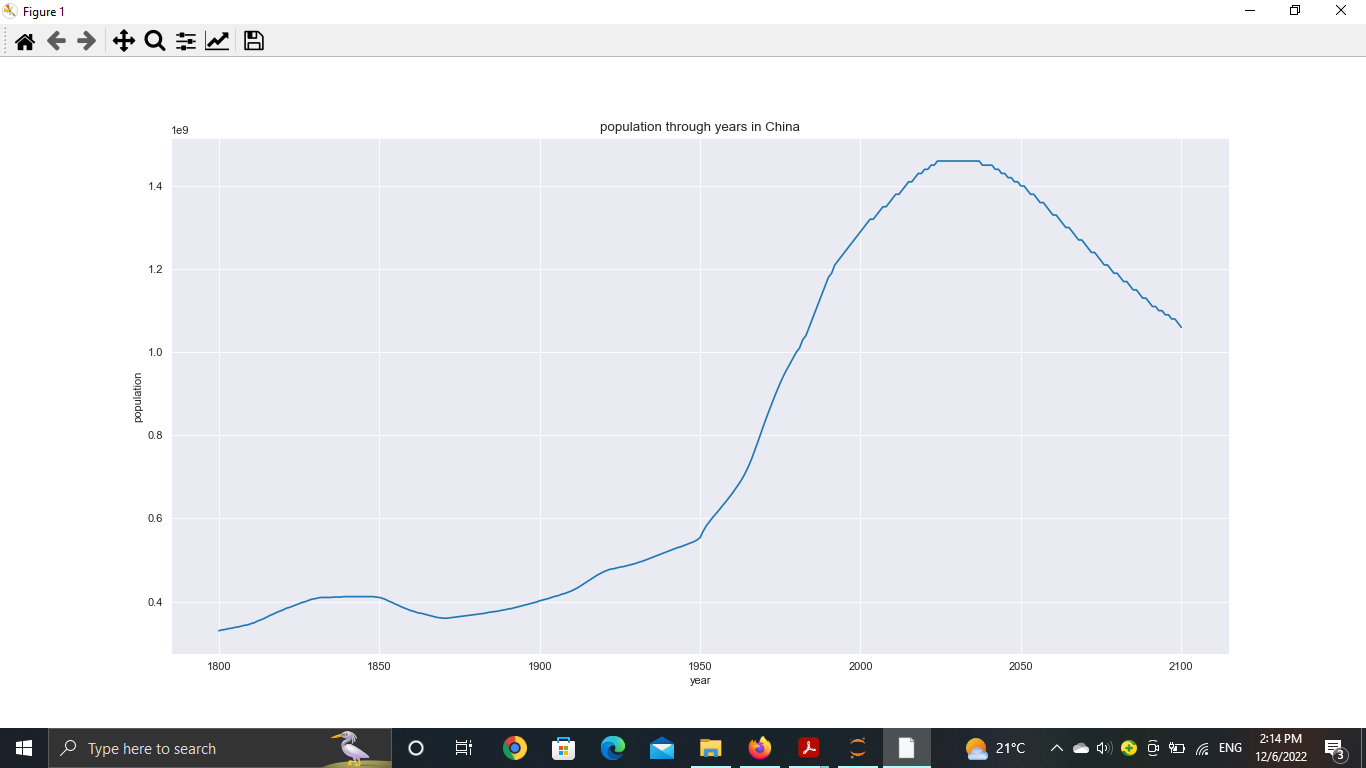

<a id='conclusions 3'></a>
# Conclusions
###  -There are certain regions of the world been growing in population better than others like india and china
###  - I chose China as a country to investigate and as we see the population rate increases remarkably but it is expected to decrease after 2025

<a id='combined'></a>
# 4- Final dataset
<a id='wrangling 3'></a>
# Data Wrangling
### - General Properties

In [32]:
#df_income,df_fert,df_population
df= df_income.merge(df_fert,on = ['country','year']).merge(df_population,on = ['country','year'])
df

,country,year,income,fertility,population
0,Afghanistan,1800,683.0,7.00,3280000.0
1,Angola,1800,700.0,6.93,1570000.0
2,Albania,1800,755.0,4.60,400000.0
3,United Arab Emirates,1800,1130.0,6.94,40200.0
4,Argentina,1800,1730.0,6.80,534000.0
...,...,...,...,...,...
46681,Samoa,2050,10700.0,2.81,267000.0
46682,Yemen,2050,4540.0,2.11,48100000.0
46683,South Africa,2050,19700.0,1.91,75500000.0
46684,Zambia,2050,5680.0,3.48,39100000.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46686 entries, 0 to 46685
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     46686 non-null  object 
 1   year        46686 non-null  int32  
 2   income      46686 non-null  float64
 3   fertility   46686 non-null  float64
 4   population  46686 non-null  float64
dtypes: float64(3), int32(1), object(1)
memory usage: 2.0+ MB


In [34]:
df.isnull().sum()

country       0
year          0
income        0
fertility     0
population    0
dtype: int64

In [35]:
df.dtypes

country        object
year            int32
income        float64
fertility     float64
population    float64
dtype: object

In [36]:
df.duplicated().sum()

0

### we don't need to clean the data because we already clean each data set before combining so our data is ready for exploration

<a id='eda 4'></a>
# Exploratory Data Analysis

In [37]:
df.describe()

,year,income,fertility,population
count,46686.00000,46686.00000,46686.000000,4.668600e+04
mean,1925.00000,7800.15842,5.006697,1.813313e+07
std,72.45766,16235.23492,1.862228,8.532232e+07
min,1800.00000,224.00000,0.900000,2.260000e+03
25%,1862.00000,1040.00000,3.450000,4.880000e+05
50%,1925.00000,1950.00000,5.680000,2.400000e+06
75%,1988.00000,5810.00000,6.510000,8.920000e+06
max,2050.00000,209000.00000,8.870000,1.640000e+09


# Year : 
Based on the year that user will input it we will explore our data and know the different countries' metrics over this year

In [38]:
y = int(input('enter the year that you want to show its metrics through countries from 1800 to 2050 : ' ))
while y not in list(df.year) :
    print('invalid input')
    y = int(input('enter the year that you want to show its metrics through countries from 1800 to 2050 : ' ))


enter the year that you want to show its metrics through countries from 1800 to 2050 : 2002


In [39]:
df_y = df.query(f'year=={y}')

In [40]:
df_y.describe()

,year,income,fertility,population
count,186.0,186.000000,186.00000,1.860000e+02
mean,2002.0,15187.430108,3.22629,3.383503e+07
std,0.0,17945.997820,1.74523,1.283978e+08
min,2002.0,715.000000,0.96000,7.830000e+04
25%,2002.0,2990.000000,1.75000,2.330000e+06
50%,2002.0,8150.000000,2.69500,7.260000e+06
75%,2002.0,17175.000000,4.38500,2.220000e+07
max,2002.0,103000.000000,7.66000,1.310000e+09


## Are there trends that can be observed between the selected metrics?

In [41]:
fig,ax = plt.subplots(nrows=3,ncols = 1)
ax[0].set_title(f'countries over {y}')
ax[0].set_xlabel('country')
ax[0].set_ylabel('income')
ax[0].bar(df_y.country,df_y['income'],color ='blue',label ='income')
ax[0].legend()
ax[1].set_xlabel('country')
ax[1].set_ylabel('fertility')
ax[1].bar(df_y.country,df_y['fertility'],color ='red',label ='fertility')
ax[1].legend()
ax[2].set_xlabel('country')
ax[2].set_ylabel('population')
ax[2].bar(df_y.country,df_y['population'],color ='green',label ='population')
ax[2].legend()
plt.show();

In [39]:
df_y.query(f'fertility == {df_y.fertility.max()}')

,country,year,income,fertility,population
37692,Niger,2002,976.0,7.66,12200000.0


In [40]:
df_y.query(f'income == {df_y.income.max()}')

,country,year,income,fertility,population
37673,Luxembourg,2002,103000.0,1.67,444000.0


In [41]:
   
df_y.query(f'population == {df_y.population.max()}')

,country,year,income,fertility,population
37603,China,2002,4020.0,1.52,1.310000e+09


### Conclousion : as we see 
the countries that have a high income like Luxembourg has a lower population and fertility
and countries like Niger that have  a high fertility the income is very low
and countries like China that have  a high population ,the income is under the mean



### what is the correlation between income and fertility?

In [47]:
plt.title(f'correlation between income and fertility in  {y}')
plt.xlabel('fertility')
plt.ylabel('income')
plt.scatter(df_y['fertility'],df_y['income'],color ='blue')
plt.show();

####  conclusion : There is a negative correlation between fertility and income

### what is the correlation between income and population?

In [113]:
plt.title(f' correlation between income and population in {y}')
plt.xlabel('population')
plt.ylabel('income')
plt.scatter(df_y['population'],df_y['income'],color ='blue')
plt.show();

####  conclusion : There is a negative correlation between population and income

### what is the correlation between fertility and population?

In [112]:
plt.title(f'correlation between fertility and population in {y}')
plt.xlabel('population')
plt.ylabel('fertility')
plt.scatter(df_y['population'],df_y['fertility'],color ='blue')
plt.show();

####  conclusion : it seems to be a  negative correlation between population and fertility but not always

## Due to characteristics we can divide the countries into four categories in each metric
### (low,below average,above average,high)

In [42]:
char = df_y.groupby(['year']).describe()
char


income                                                             \
      count          mean          std    min     25%     50%      75%   
year                                                                     
2002  186.0  15187.430108  17945.99782  715.0  2990.0  8150.0  17175.0   

               fertility           ...              population                \
           max     count     mean  ...    75%   max      count          mean   
year                               ...                                         
2002  103000.0     186.0  3.22629  ...  4.385  7.66      186.0  3.383503e+07   

                                                                             
               std      min        25%        50%         75%           max  
year                                                                         
2002  1.283978e+08  78300.0  2330000.0  7260000.0  22200000.0  1.310000e+09  

[1 rows x 24 columns]

In [64]:
# due to income
low = df_y.query('income>={} & income<{} '.format(char.income['min'].values,char.income['25%'].values))
below_average = df_y.query('income>={} & income<{} '.format(char.income['25%'].values,char.income['50%'].values))
above_average = df_y.query('income>={} & income<{} '.format(char.income['50%'].values,char.income['75%'].values))
high = df_y.query('income>={} & income<={} '.format(char.income['75%'].values,char.income['max'].values))
l = {'low':low.country.values,'below_average':below_average.country.values,'above_average':above_average.country.values,'high':high.country.values}
print('                               countries grouping based on income')
pd.Series(l)

                               countries grouping based on income


low              [Afghanistan, Angola, Burundi, Benin, Burkina ...
below_average    [Albania, Armenia, Azerbaijan, Belize, Bolivia...
above_average    [Argentina, Antigua and Barbuda, Bulgaria, Bos...
high             [United Arab Emirates, Australia, Austria, Bel...
dtype: object

In [104]:
plt.pie(low.income,labels = low.country)
plt.title(f'low income countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [105]:
plt.pie(below_average.income,labels = below_average.country)
plt.title(f'under average income countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [106]:
plt.pie(above_average.income,labels = above_average.country)
plt.title(f'above average income countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [107]:
plt.pie(high.income,labels = high.country)
plt.title(f'high income countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [65]:
# due to population
low = df_y.query('population>={} & population<{} '.format(char.population['min'].values,char.population['25%'].values))
below_average = df_y.query('population>={} & population<{} '.format(char.population['25%'].values,char.population['50%'].values))
above_average = df_y.query('population>={} & population<{} '.format(char.population['50%'].values,char.population['75%'].values))
high = df_y.query('population>={} & population<={} '.format(char.population['75%'].values,char.population['max'].values))
l = {'low':low.country.values,'below_average':below_average.country.values,'above_average':above_average.country.values,'high':high.country.values}
print('                               countries grouping based on population')
pd.Series(l)

                               countries grouping based on population


low              [Antigua and Barbuda, Bahrain, Bahamas, Belize...
below_average    [Albania, United Arab Emirates, Armenia, Burun...
above_average    [Angola, Australia, Austria, Azerbaijan, Belgi...
high             [Afghanistan, Argentina, Bangladesh, Brazil, C...
dtype: object

In [99]:
plt.pie(low.population,labels = low.country)
plt.title(f'low population countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [100]:
plt.pie(below_average.population,labels = below_average.country)
plt.title(f'below_average population countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [101]:
plt.pie(above_average.population,labels = above_average.country)
plt.title(f'above_average population countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [102]:
plt.pie(high.population,labels = high.country)
plt.title(f'high population countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [66]:
# due to fertility
low = df_y.query('fertility>={} & fertility<{} '.format(char.fertility['min'].values,char.fertility['25%'].values))
below_average = df_y.query('fertility>={} & fertility<{} '.format(char.fertility['25%'].values,char.fertility['50%'].values))
above_average = df_y.query('fertility>={} & fertility<{} '.format(char.fertility['50%'].values,char.fertility['75%'].values))
high = df_y.query('fertility>={} & fertility<={} '.format(char.fertility['75%'].values,char.fertility['max'].values))
l = {'low':low.country.values,'below_average':below_average.country.values,'above_average':above_average.country.values,'high':high.country.values}
print('                               countries grouping based on fertility')
pd.Series(l)

                               countries grouping based on fertility


low              [Armenia, Austria, Belgium, Bulgaria, Bosnia a...
below_average    [Albania, United Arab Emirates, Argentina, Ant...
above_average    [Bangladesh, Belize, Bolivia, Bhutan, Botswana...
high             [Afghanistan, Angola, Burundi, Benin, Burkina ...
dtype: object

In [67]:
plt.pie(low.fertility,labels = low.country)
plt.title(f'low fertility countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [91]:
plt.pie(below_average.fertility,labels = below_average.country)
plt.title(f'below_average fertility countries  in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [92]:
plt.pie(above_average.fertility,labels = above_average.country)
plt.title(f'above_average fertility countries in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [95]:
plt.pie(high.fertility,labels = high.country)
plt.title(f'high fertility countries in {y}')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### as we saw in the previous pie charts the classification in each metric

# Country: 
Based on the country that user will input it we will explore our data and know the metrics for this country through years

In [109]:
c = input('enter the country that you want to see its metrics over years : ' ).title()
while c not in list(df.country) :
    print('invalid input')
    c = input('enter the country that you want to see its metrics over years : ' ).title()


enter the country that you want to see its metrics over years : tunisia


In [110]:
df_c = df[df.country==c]

In [111]:
fig,ax = plt.subplots(nrows=3,ncols = 1)
ax[0].set_title(f'metrics through {c}')
ax[0].set_ylabel('income')
ax[0].plot(df_c.year,df_c['income'],color ='blue',label ='income')
ax[0].legend()
ax[1].set_ylabel('fertility')
ax[1].plot(df_c.year,df_c['fertility'],color ='red',label ='fertility')
ax[1].legend()
ax[2].set_xlabel('year')
ax[2].set_ylabel('population')
ax[2].plot(df_c.year,df_c['population'],color ='green',label ='population')
ax[2].legend()
plt.show();

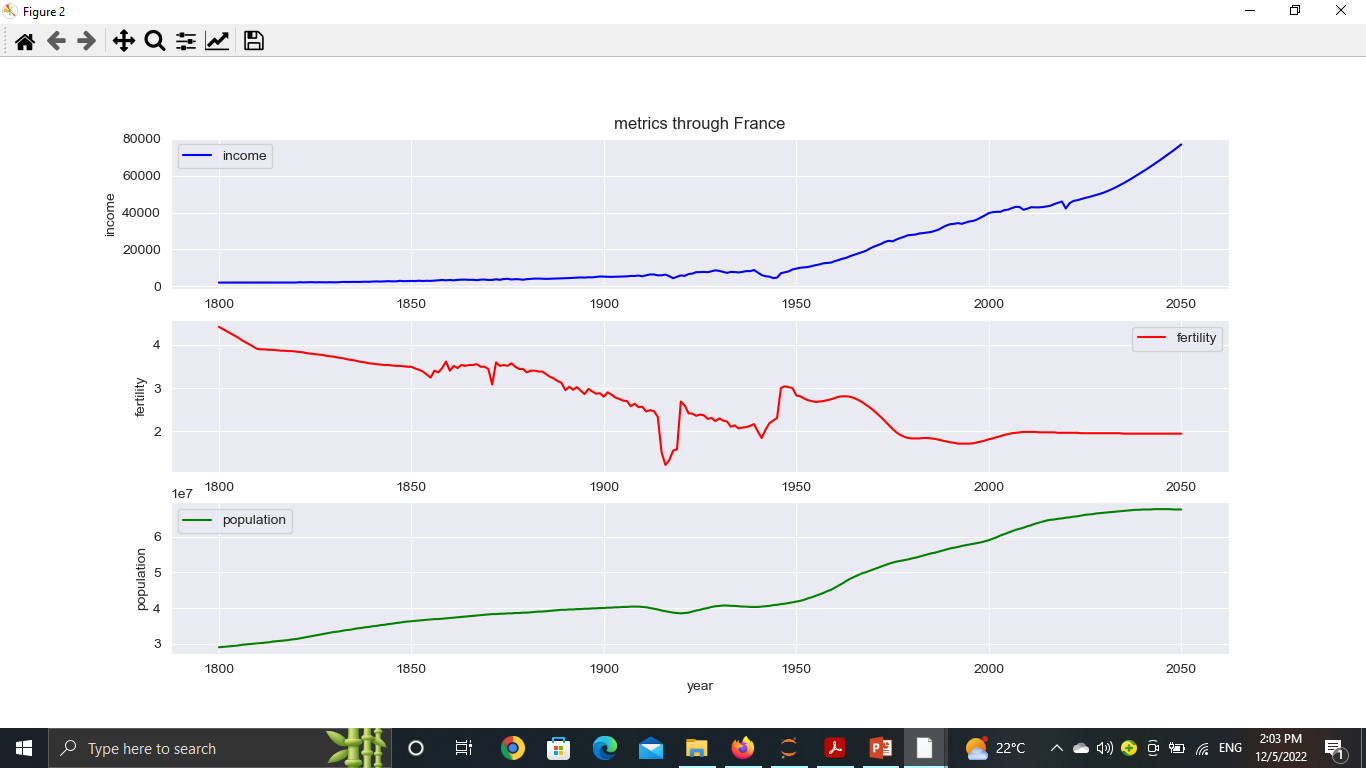

### conclusion : i choosed france as a country and as we see after 1950 the population started to increase and the income started to jump  high and fertility decreased and i think that due to immigrants that came to france and of course each country has different properties

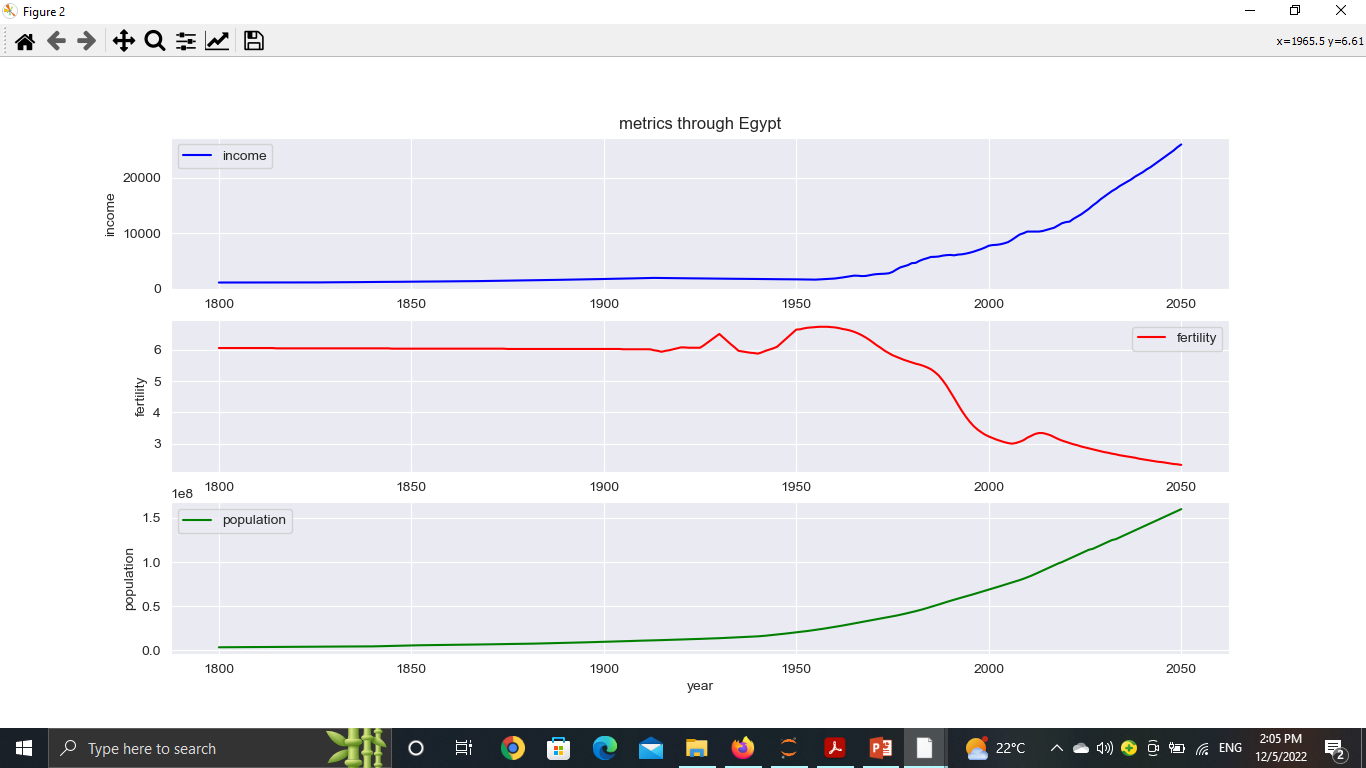

### conclusion : and here as we see in Egypt after 1967 the fertilility started to decrease and that influence on income that makes it increases for the person but the population doesn't affect it increases with the same rate

<a id='conclusions 4'></a>
# Conclusions
###  - i choosed france as a country and as we see after 1950 the population started to increase and the income started to jump high and fertility decreased and i think that due to immigrants that came to france and of course each country has different properties
### - we see in Egypt after 1967 the fertilility started to decrease and that influence on income that makes it increases for the person but the population doesn't affect it increases with the same rate
### - we  divided the countries into four categories in each metric (low-/ below-average/ above-average / high)
### - There is a negative correlation between fertility and income
### - There is a negative correlation between population and income
### - it seems to be a  negative correlation between population and fertility but not always